<center><font color = "Red" size = 5>K - Means Clustering</font></center>

<center><font size = 4 color = "blue">K-means clustering is one of the simplest and popular <b>UNSUPERVISED</b> machine learning algorithms.</center><br>


<font size = 4.5><b>Introduction</font><br></b>
<font size = 3><ul>
<li>K - Means Clustering make inferences from data using only input vectors without labelled outcomes.<br></li><br>
<li>K - means clustering makes partition of "n" observations into "k" clusters in which each observation belongs to the cluster with the nearest centroid<br><br>
<li>A cluster refers to a collection of data points aggregated together because of certain similarities</li>
    </ul></font>

### Applications Of K - Means Clustering

<ul><li><font size = 3 >Academic performance - Based on the scores, students are categorized into grades like A, B, or C.</li><br><br>
<li>Search engines - Clustering forms a backbone of search engines. When a search is performed, the search results need to be grouped, and the search engines use clustering to do this. </li><br>
<li>Customer segmentation - It helps marketers improve their customer base, work on target areas, and segment customers based on purchase history, interests, or activity monitoring. </li></font>

<font size = 4><b>Example For clustering <br></font></b>


    A bank wants to give credit card offers to its customers. Currently, they look at the details of each customer and based on this information they decide which offer should be given to which customer.
        
    The bank will have millions of customers. So here clustering plays a vital role in segregating customers into different groups. For instance, the bank can group the customers based on their income:


![test](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/08/Screenshot-from-2019-08-07-15-19-27.png)

### Steps to perform K - Means Clustering
   <ol>
    <li>Specify the number of clusters <b>(K)</b> to be created </li><br>
    <li>Select randomly <b>(K)</b> objects from the dataset as the initial cluster centroids</li><br>
   <li>Assign each observation to their closest centroid, based on the Euclidean distance between the object and the centroid</li><br>
<li>For each of the k clusters update the cluster centroid by calculating the new mean values of all the data points in the cluster.</li><br>
<li>Iteratively minimize the total within sum of square. That is, iterating steps 3 and 4 until the cluster assignments stop changing</li><br> 

### Importing Packages

In [39]:
library(factoextra)
library(ggplot)
library(cluster)

### Loading the Dataset

USArrests - This data set contains statistics, in arrests per 100,000 residents
for assault, murder, and rape in each of the 50 US states in 1973.
Also given is the percent of the population living in urban areas.

In [26]:
#Inbuilt Dataset
df = USArrests
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [27]:
summary(df)

     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

## Data Preprocessing
### Scaling data - To avoid biased results 

In [29]:
df <- scale(USArrests) # Scaling the data
head(df, n = 15)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.52090661,-0.003416473
Alaska,0.50786248,1.1068225,-1.21176419,2.484202941
Arizona,0.07163341,1.4788032,0.99898006,1.042878388
Arkansas,0.23234938,0.2308680,-1.07359268,-0.184916602
California,0.27826823,1.2628144,1.75892340,2.067820292
Colorado,0.02571456,0.3988593,0.86080854,1.864967207
Connecticut,-1.03041900,-0.7290821,0.79172279,-1.081740768
Delaware,-0.43347395,0.8068381,0.44629400,-0.579946294
Florida,1.74767144,1.9707777,0.99898006,1.138966691
Georgia,2.20685994,0.4828549,-0.38273510,0.487701523


In [30]:
summary(df)

     Murder           Assault           UrbanPop             Rape        
 Min.   :-1.6044   Min.   :-1.5090   Min.   :-2.31714   Min.   :-1.4874  
 1st Qu.:-0.8525   1st Qu.:-0.7411   1st Qu.:-0.76271   1st Qu.:-0.6574  
 Median :-0.1235   Median :-0.1411   Median : 0.03178   Median :-0.1209  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.7949   3rd Qu.: 0.9388   3rd Qu.: 0.84354   3rd Qu.: 0.5277  
 Max.   : 2.2069   Max.   : 1.9948   Max.   : 1.75892   Max.   : 2.6444  

### STEP 1 : FINDING NUMBER OF K VALUES

To find the appropriate suitable K value:<br>
     <ol><li>Compute k-means clustering using different values of clusters k. <br></li><br>
    <li>Next, the wss (within sum of square) is drawn according to the number of clusters. <br></li><br>
    <li>The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.</li>

### After Performing Elbow Method<br><br>
![ElbowCurveWithoutIntercept](https://github.com/klmsathish/R_Programming/blob/master/DAY%20-%209/Images/ElbowCurveWithoutIntercept.png?raw=true)
<br><br><br>
<font size = 3.5>The Elbow method looks at the total within-cluster sum of square (WSS) as a function with respect to the number of clusters.<br><br>The location of a knee in the plot is usually considered as an indicator of the appropriate number of clusters because it means that adding another cluster does not improve much better the partition<br><br>
So Here k = 4 is a best fit and it points out position of elbow </font>

<br><br>
code :
fviz_nbclust(df, kmeans, method = "wss") +
  geom_vline(xintercept = 4, linetype = 3)+
  labs(subtitle = "Elbow method")


![/ElbowCurveWithIntercept](https://github.com/klmsathish/R_Programming/blob/master/DAY%20-%209/Images/ElbowCurveWithIntercept.png?raw=true)

### Compute k-means with k = 4

In [31]:
set.seed(27)                          
kmcluster <- kmeans(df, 4, nstart = 25)

set.seed() function in order to set a key for random number generator.As k-means clustering algorithm starts with k randomly selected centroids<br>
Syntax <- kmeans("dataframe_name",Number of clusters,nstart = no. of different random starting choices)

In [36]:
kmcluster

K-means clustering with 4 clusters of sizes 16, 13, 8, 13

Cluster means:
      Murder    Assault   UrbanPop        Rape
1 -0.4894375 -0.3826001  0.5758298 -0.26165379
2  0.6950701  1.0394414  0.7226370  1.27693964
3  1.4118898  0.8743346 -0.8145211  0.01927104
4 -0.9615407 -1.1066010 -0.9301069 -0.96676331

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             3              2              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              1              1              2              3 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             1              4              2              1              4 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             1              4              3              4              2 
 Massachusetts       Michigan      Minnesota    Mississippi    

In [44]:
table(kmcluster$tot.withinss)


56.4031734582928 
               1 

In [43]:
table(kmcluster$cluster)


 1  2  3  4 
16 13  8 13 

### Plotting & Visulaization

Code :fviz_cluster(kmcluster, data = df)


<br>![](https://github.com/klmsathish/R_Programming/blob/master/DAY%20-%209/Images/ClusterPlot_1.png?raw=true)

## Iris Dataset

In [8]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


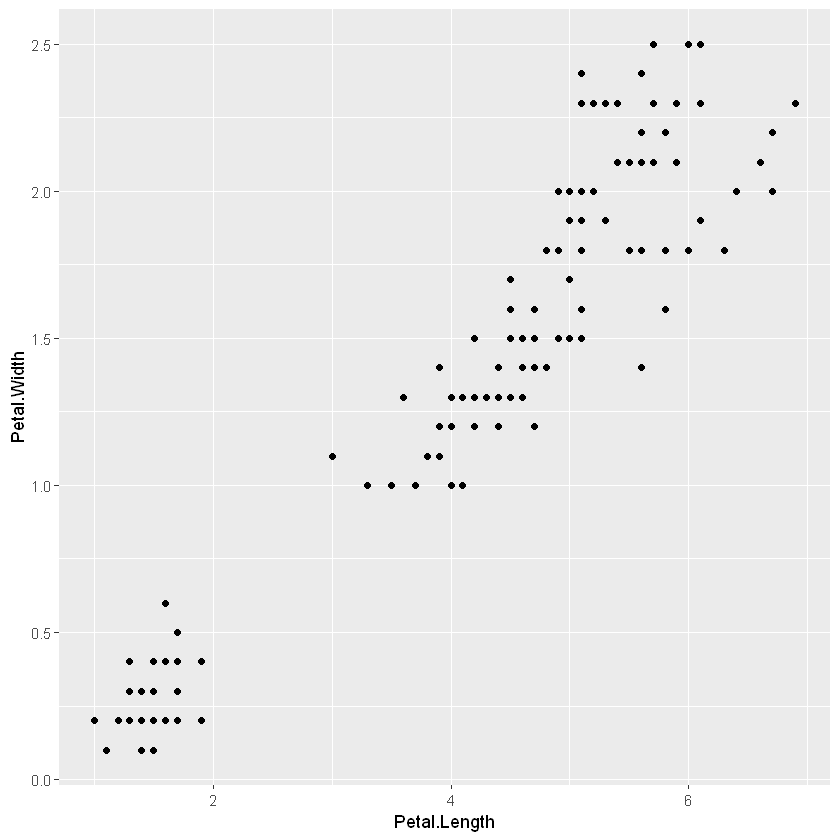

In [9]:
ggplot(iris, aes(Petal.Length, Petal.Width)) + geom_point()

### To Find optimal number of clusters<br>
<font size = 3>Elbow Method</font>



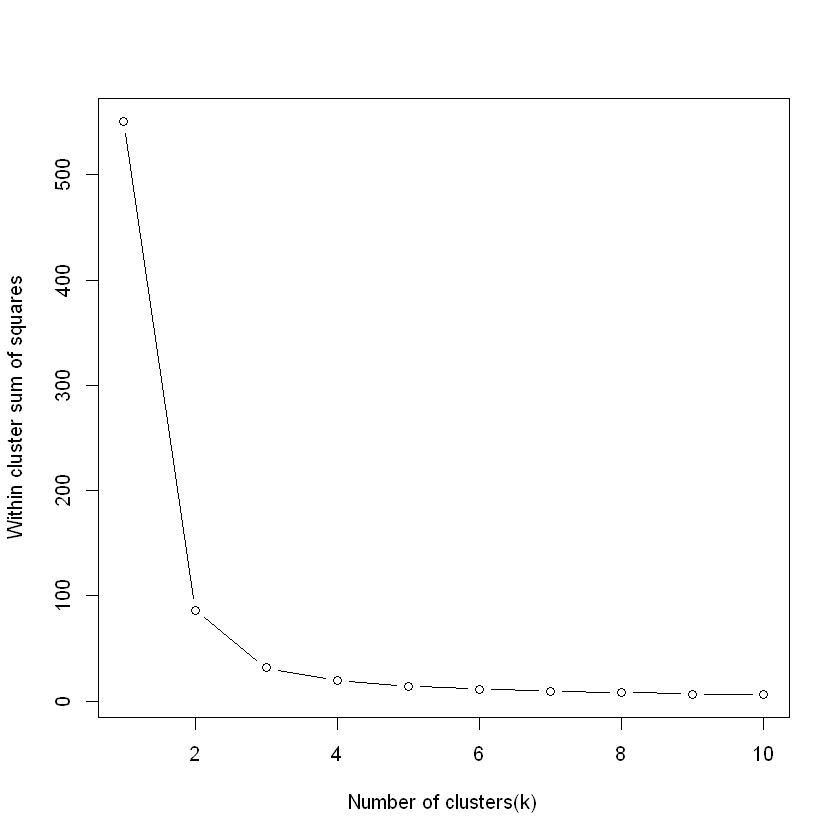

In [49]:
set.seed(27)
k.max <- 10

#nstart	      - No. of  random sets should be chosen?
#Total within - cluster sum of squares, i.e. sum(withinss).
#sapply       - takes list, vector or data frame as input and gives output in vector or matrix.
#iter. max is the number of times the algorithm will repeat the cluster assignment and moving of centroids. 
#nstart is the number of times the initial starting points are re-sampled.

wss<- sapply(1:k.max,function(k){kmeans(iris[,3:4],k,nstart = 20,iter.max = 20)$tot.withinss})
plot(1:k.max,wss, type= "b", xlab = "Number of clusters(k)",ylab = "Within cluster sum of squares")

<font size = 4>Here we can see best fit at k = 3 and it points out position of elbow</font>

In [51]:
set.seed(20)
irisCluster <- kmeans(iris[, 1:4], 3, nstart = 20)
irisCluster

K-means clustering with 3 clusters of sizes 50, 62, 38

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     5.006000    3.428000     1.462000    0.246000
2     5.901613    2.748387     4.393548    1.433871
3     6.850000    3.073684     5.742105    2.071053

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

Within cluster sum of squares by cluster:
[1] 15.15100 39.82097 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [11]:
irisCluster$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

In [12]:
irisCluster$tot.withinss

[1] 78.85144

In [13]:
iris$Species

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor versicolor versicolor
 [79] versicolor versicolor versicolor versicolor versicolor versicolor
 [85] versicolor versicolor versicolor versicolor versicolor versicolor
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor virginica  virginica 
[103] virginica  virginica  virginica  virginica  virginica  virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica  virginica  virginica 
[121] virginica  virginica  virginica  virginica  virginica  virginica 
[127] virginica  virginica  virginica  virginica  virginica  virginica 
[133] virginica  virginica  virginica  virginica  virginica  virginica 
[139] virginica  virginica  virginica  virginica  virginica  virginica 
[145] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [14]:
table(irisCluster$cluster, iris$Species)

   
    setosa versicolor virginica
  1     50          0         0
  2      0         48        14
  3      0          2        36

In [15]:
irisCluster$cluster <- as.factor(irisCluster$cluster)

In [16]:
irisCluster$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2
Levels: 1 2 3

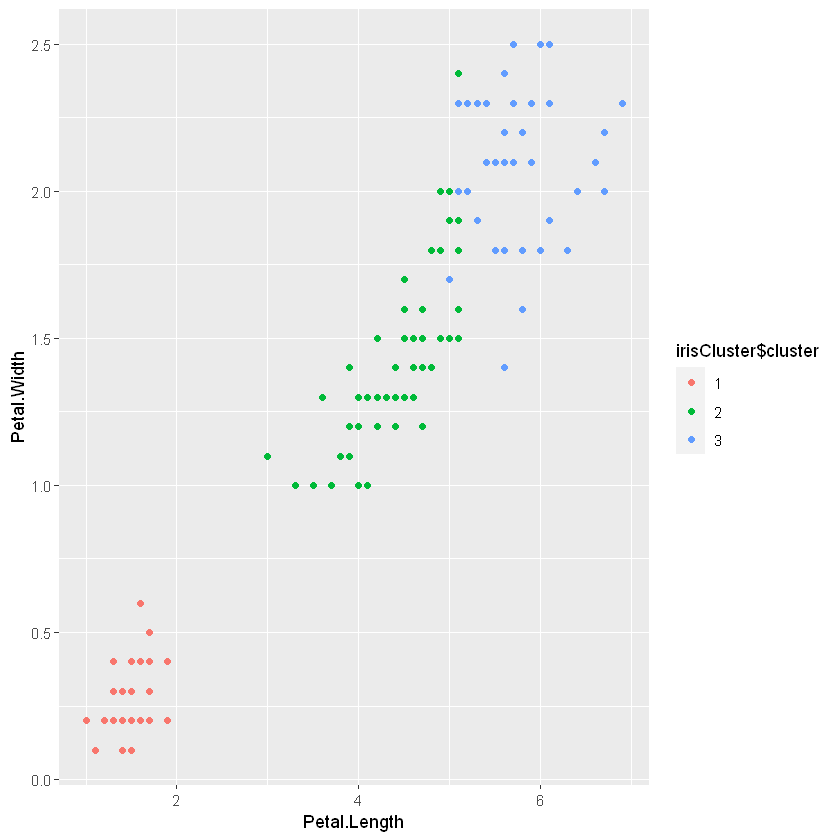

In [17]:
ggplot(iris, aes(Petal.Length, Petal.Width, color = irisCluster$cluster)) + geom_point()

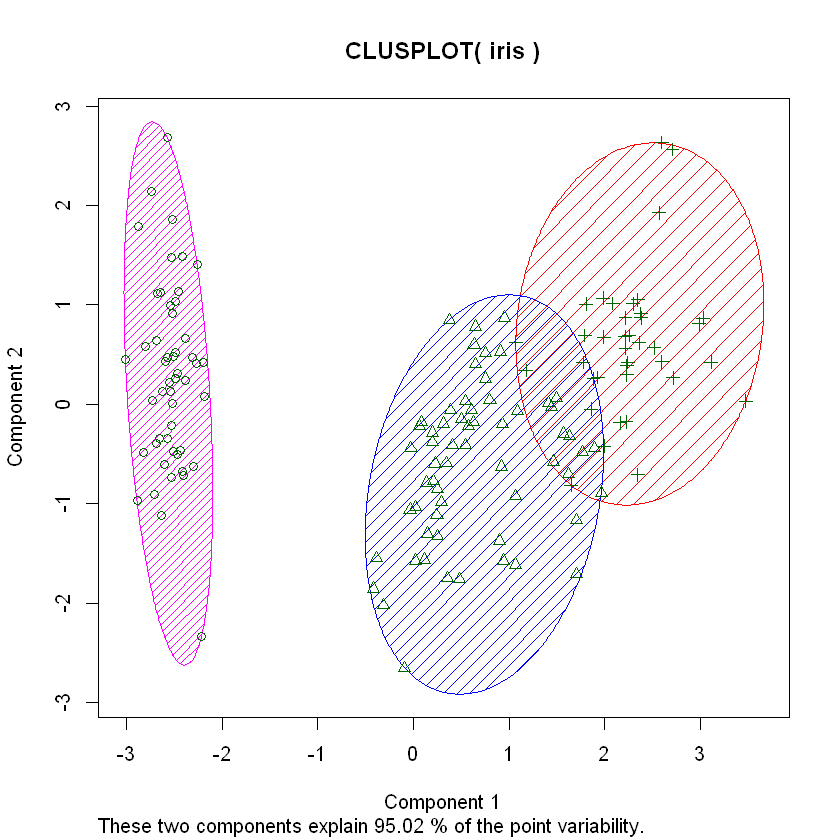

In [24]:
clusplot(iris, irisCluster$cluster, color=T, shade=T,lines=0)

## Some Takeaways
<font size = 3><ul>
    <li>Scale/standardize the data when applying kmeans algorithm.</li>
       <br>
    <li>Elbow method for selecting number of clusters</li>
    <br>
    <li>Kmeans gives more weight to the bigger clusters.</li>
    <br>
    <li>Kmeans may still cluster the data even if it can’t be clustered</li>
    <br>
    <li> Different initial partitions can result in different final clusters.</li>
    <br>
    <li>It can not handle noisy data and outliers.</li>
    <br>
    <li>It is not suitable to identify clusters with non-convex shapes(irregular shapes - elliptical).</li></font>

<center><font size = 5>****THANK YOU****</center></font>